In [198]:
import gzip            
import io              
import numpy as np
import pandas as pd    
import pymysql.cursors 
import rdflib
from rdflib import Namespace
import urllib.request 
import math
import scipy
from scipy import stats
import collections

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [2]:
g = rdflib.Graph()
g.parse('astr_dates.ttl', format='turtle')

<Graph identifier=Neacb8348b5a84f028aafd49429e3200d (<class 'rdflib.graph.Graph'>)>

In [3]:
g.parse('astr.ttl', format='turtle')

<Graph identifier=Neacb8348b5a84f028aafd49429e3200d (<class 'rdflib.graph.Graph'>)>

In [6]:
result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT * WHERE {
            ?1 ?2 ?3 .
            FILTER( ?1 = <http://www.astronomoumenos.com/id/wi6919791_pinakes> )
            }
            """)

pd.DataFrame(result.bindings)

,1,2,3
0,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,1250
1,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,315v
2,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,http://www.astronomoumenos.com/id/pinakes
3,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,314v
4,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,1270
5,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.w3.org/1999/02/22-rdf-syntax-ns#type,http://www.astronomoumenos.com/ontologies/astr...
6,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,315r-v
7,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,311r-v
8,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,1200
9,http://www.astronomoumenos.com/id/wi6919791_pi...,http://www.astronomoumenos.com/ontologies/astr...,1270


In [8]:
result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?ms (COUNT(?wo) AS ?c) WHERE {
            ?ms astr:msContains ?wi .
            ?wi astr:witnessOf ?wo .
            #FILTER( ?wo = <> )
            }
            GROUP BY ?ms
            ORDER BY DESC(?c)
            """)

pd.DataFrame(result.bindings)

,c,ms
0,173,http://www.astronomoumenos.com/id/ms9597177
1,166,http://www.astronomoumenos.com/id/ms7320119
2,138,http://www.astronomoumenos.com/id/ms8782847
3,125,http://www.astronomoumenos.com/id/ms8636678
4,121,http://www.astronomoumenos.com/id/ms3467534
5,111,http://www.astronomoumenos.com/id/ms2047333
6,109,http://www.astronomoumenos.com/id/ms1073429
7,100,http://www.astronomoumenos.com/id/ms4656737
8,91,http://www.astronomoumenos.com/id/ms9860755
9,89,http://www.astronomoumenos.com/id/ms1364457


In [9]:
result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?ms ?wi1 (COUNT(?wo2) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf ?wo1 .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            FILTER( ?wo1 = <http://www.astronomoumenos.com/id/wo3990915> && ?wo2 != <http://www.astronomoumenos.com/id/wo3990915> )
            }
            GROUP BY ?ms ?wi1
            ORDER BY DESC(?c)
            """)

pd.DataFrame(result.bindings)

,c,ms,wi1
0,36,http://www.astronomoumenos.com/id/ms9594875,http://www.astronomoumenos.com/id/wi2187171
1,33,http://www.astronomoumenos.com/id/ms8089112,http://www.astronomoumenos.com/id/wi8647447
2,18,http://www.astronomoumenos.com/id/ms4241159,http://www.astronomoumenos.com/id/wi9365812
3,18,http://www.astronomoumenos.com/id/ms1295103,http://www.astronomoumenos.com/id/wi2762888
4,17,http://www.astronomoumenos.com/id/ms6488006,http://www.astronomoumenos.com/id/wi7633296
5,16,http://www.astronomoumenos.com/id/ms8065685,http://www.astronomoumenos.com/id/wi7528935
6,14,http://www.astronomoumenos.com/id/ms3360435,http://www.astronomoumenos.com/id/wi4176955
7,13,http://www.astronomoumenos.com/id/ms9636330,http://www.astronomoumenos.com/id/wi3082223
8,12,http://www.astronomoumenos.com/id/ms5815251,http://www.astronomoumenos.com/id/wi8758193
9,11,http://www.astronomoumenos.com/id/ms5582883,http://www.astronomoumenos.com/id/wi5441495


In [12]:
result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?ms (COUNT(DISTINCT ?wo2) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/wo3990915> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/wo3990915> )
            }
            GROUP BY ?ms
            ORDER BY DESC(?c)
            """)

pd.DataFrame(result.bindings)

,c,ms
0,36,http://www.astronomoumenos.com/id/ms9594875
1,33,http://www.astronomoumenos.com/id/ms8089112
2,18,http://www.astronomoumenos.com/id/ms1295103
3,18,http://www.astronomoumenos.com/id/ms4241159
4,17,http://www.astronomoumenos.com/id/ms6488006
5,16,http://www.astronomoumenos.com/id/ms8065685
6,14,http://www.astronomoumenos.com/id/ms3360435
7,13,http://www.astronomoumenos.com/id/ms9636330
8,12,http://www.astronomoumenos.com/id/ms5815251
9,11,http://www.astronomoumenos.com/id/ms2191133


In [69]:
collectionLA = ('wo5649233','wo9903453','wo9036913','wo5476584','wo2055302','wo2911568','wo8243216','wo3990915','wo6962105','wo5748142','wo9989402','wo9833553')
# wo9036913 Optica wo5476584 Theon recension
dictLA = dict()

for work in collectionLA:
    dictLA[work] = list()
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?ms (COUNT(DISTINCT ?wo2) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?ms
            ORDER BY DESC(?c)
            """ % (work, work))

    dictLA[work].append(pd.DataFrame(result.bindings))

In [70]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]


for work in dictLA:
    print(work)
    cols = list(dictLA[work][0])
    dictLA[work].append(list())
    
    for index, row in dictLA[work][0].iterrows():
        #print(row[cols[0]])
        dictLA[work][1].append(int(row[cols[0]]))
        
    dictLA[work][1] = np.asarray(dictLA[work][1])
    dictLA[work].append(np.mean(dictLA[work][1]))
    dictLA[work].append(np.std(dictLA[work][1]))
    dictLA[work].append(stats.trim_mean(dictLA[work][1], 0.10))
    
    dictLA[work].append(reject_outliers(dictLA[work][1],5.189))
    
    
    print(dictLA[work][1])
    print(dictLA[work][2])
    print(dictLA[work][3])
    print(dictLA[work][4])
    print(dictLA[work][5])

wo9833553
[70 33 30 24 18 18 16 14 13 13 11 11 10 10 10 10  9  8  8  8  8  7  7  6  6
  6  5  5  4  4  4  2]
12.75
12.4849909892
10.1923076923
[24 18 18 16 14 13 13 11 11 10 10 10 10  9  8  8  8  8  7  7  6  6  6  5  5
  4  4  4  2]
wo6962105
[70 33 28 24 18 18 17 16 15 14 13 12 11 11 10 10 10 10  9  8  8  8  8  6  6
  6  5  5  5  5  4  4  4  3  3  3  1]
11.9189189189
11.9489417792
9.77419354839
[28 24 18 18 17 16 15 14 13 12 11 11 10 10 10 10  9  8  8  8  8  6  6  6  5
  5  5  5  4  4  4  3  3  3  1]
wo8243216
[70 33 27 26 25 18 18 17 16 13 12 11 10 10 10  6  5  5  4  2]
16.9
14.7305804366
14.3125
[33 27 26 25 18 18 17 16 13 12 11 10 10 10  6  5  5  4  2]
wo3990915
[36 33 18 18 17 16 14 13 12 11 11 10 10 10 10  8  8  8  8  8  6  6  6  5  5
  5  4  4  2  2  1  1  1]
9.90909090909
7.8522864316
8.77777777778
[18 18 17 16 14 13 12 11 11 10 10 10 10  8  8  8  8  8  6  6  6  5  5  5  4
  4  2  2  1  1  1]
wo9036913
[18 18 16 16 14 14 13 13 13 11 10 10 10  9  8  8  7  7  7  6  6  6  6  6  6


In [116]:
collectionLA = ('wo5649233','wo9903453','wo9036913','wo5476584','wo2055302','wo2911568','wo8243216','wo3990915','wo6962105','wo5748142','wo9989402','wo9833553')
# wo9036913 Optica wo5476584 Theon recension
dictLA = dict()

#work = 'wo8243216'

for work in collectionLA:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictLA[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictLA[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l')]])



wo5649233 Data
54
    c                                               l
0  33                                      Phaenomena
1  27                              Catoptrica (spur.)
2  27                   Commentarium in Euclidis data
3  21                                          Optica
4  16                                     Anaphoricus
5  16                                        Elementa
6  14  De magnitudinibus et distantiis solis et lunae


wo9903453 Phaenomena
48
    c                              l
0  33                           Data
1  29             Catoptrica (spur.)
2  29                         Optica
3  18        De ortibus et occasibus
4  18        De sphaera quae mouetur
5  17  Commentarium in Euclidis data
6  15                      Sphaerica
7  15                       Elementa
8  15                    Anaphoricus


wo9036913 Optica
45
    c                              l
0  29                     Phaenomena
1  28             Catoptrica (spur.)
2  21              

In [120]:
collectionGa = ('wo9507454','wo9104982','wo9126620','wo7590464','wo5201901','wo9918682','wo9508506','wo2424915','wo8030049','wo3258119','wo7413161','wo3983175','wo2806506','wo5594388','wo4306010','wo7068615','wo6250400','wo4323515','wo6458212','wo9278881','wo7238053','wo3093197','wo2954639','wo3796005','wo6632198','wo8195108','wo1043636','wo6382940','wo1956278','wo7859660','wo1275851','wo4640928','wo5499745','wo7041218','wo6505208','wo4256003','wo7287694','wo7139876','wo5892324','wo1486349','wo4739951','wo3782973','wo7284932','wo6624424','wo8141518','wo4656358','wo2977926','wo4379997','wo2299894','wo8555256','wo3278668','wo2681317','wo9633060','wo4500494','wo5800917','wo2378200','wo8762474','wo2686672','wo8992919','wo8954565','wo1147267','wo1866688','wo5779475','wo2664331','wo6127126','wo4364224','wo4162766','wo2677586','wo3361566','wo8949418','wo6809399','wo2332805','wo7695113','wo6222520','wo3849972','wo3424367','wo3243242','wo1418287','wo9035060','wo2386534','wo7249397','wo2971301','wo1236012','wo5977883','wo8619734','wo9251636','wo2500995','wo5753980','wo4809823','wo9797466','wo3809754','wo8825947','wo8612313','wo2391833','wo6560273','wo8934448','wo9760335','wo1635876','wo3841505','wo4162858','wo2751268','wo1093232','wo5322935','wo9010447','wo5089504','wo2063775','wo6718818','wo8114408','wo2324767','wo5085100','wo9294472','wo3566990','wo1578242','wo2375349','wo7929321','wo8957592','wo9124479','wo3745521','wo1477792','wo9385314','wo3074457','wo5122433','wo6614650','wo9946642','wo8662108','wo1989075','wo9217112','wo6484117','wo1951959','wo9370326','wo9319824','wo1004416','wo3431121','wo6730359','wo3256626','wo6465524','wo7561063','wo1901589','wo6696921','wo9030741','wo6436011','wo5294337','wo6051872','wo5935200','wo4611209','wo4319959','wo7098276','wo8813373','wo3263981','wo8646327','wo2977281','wo7637159','wo2234867','wo9943998','wo3660655','wo3584314','wo2401478','wo5252623','wo7154366','wo3386043','wo1948461','wo9800167','wo1439036','wo2643734','wo1324994','wo8054508')

dictGa = dict()

for work in collectionGa:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictGa[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictGa[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictGa[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo9507454 Opera
131
    c      l                   l2
0  36  Opera  Hippocrates medicus


wo9104982 De utilitate respirationis liber
4
   c                                         l               l2
0  3    De praenotione ad Posthumum (Epigenem)  Galenus medicus
1  3               De theriaca ad Pamphilianum  Galenus medicus
2  3                     De antidotis libri II  Galenus medicus
3  3              De tumoribus praeter naturam  Galenus medicus
4  3                    De theriaca ad Pisonem  Galenus medicus
5  3  De animi cuiuslibet pecc. dign. et cura.  Galenus medicus
6  3     De naturalibus facultatibus libri III  Galenus medicus


wo9126620 De ponderibus et mensuris
12
   c                  l                       l2
0  5              Opera          Galenus medicus
1  5            Quaedam  Astrologica astronomica
2  4          Aphorismi      Hippocrates medicus
3  4  Libri medicinales          Aetius Amidenus


wo7590464 In Hippocratis aphorismos commentarii VII
39
    c   

In [121]:
collectionAe = ('wo5894821','wo8284366','wo2370030','wo3645886','wo3108977','wo4182363','wo2624157','wo1466425','wo4980500')
dictAe = dict()

for work in collectionAe:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictAe[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictAe[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictAe[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo5894821 Opera
44
    c                     l         l2
0  17    Prometheus uinctus  Aeschylus
1  16  Septem contra Thebas  Aeschylus
2  14                Persae  Aeschylus
3  13                 Opera  Sophocles


wo8284366 Persae
81
    c                     l         l2
0  72  Septem contra Thebas  Aeschylus
1  70    Prometheus uinctus  Aeschylus
2  22               Electra  Sophocles
3  21                  Aiax  Sophocles


wo2370030 Prometheus uinctus
123
     c                     l         l2
0  107  Septem contra Thebas  Aeschylus
1   70                Persae  Aeschylus
2   33                  Aiax  Sophocles


wo3645886 Septem contra Thebas
115
     c                   l         l2
0  107  Prometheus uinctus  Aeschylus
1   72              Persae  Aeschylus
2   29             Electra  Sophocles


wo3108977 Eumenides
15
   c                     l         l2
0  9             Agamemnon  Aeschylus
1  9                Persae  Aeschylus
2  9  Septem contra Thebas  Aeschylus
3  9  

In [122]:
collectionSo = ('wo1688941','wo8529873','wo3989302','wo9205589','wo2738142','wo1397531','wo3799379','wo7511359')

dictSo = dict()

for work in collectionSo:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictSo[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictSo[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictSo[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo1688941 Aiax
216
     c                 l         l2
0  154           Electra  Sophocles
1  113  Oedipus tyrannus  Sophocles
2   67            Hecuba  Euripides
3   59           Orestes  Euripides


wo8529873 Electra
168
     c                 l         l2
0  154              Aiax  Sophocles
1  111  Oedipus tyrannus  Sophocles
2   52            Hecuba  Euripides
3   50           Orestes  Euripides


wo3989302 Oedipus tyrannus
125
     c                                      l                       l2
0  113                                   Aiax                Sophocles
1  111                                Electra                Sophocles
2   42                                Orestes                Euripides
3   40                                 Hecuba                Euripides
4   39                               Antigone                Sophocles
5   35                             Phoenissae                Euripides
6   33  Hypothesis in Sophoclis Oedipum regem  Aristophanes Byzan

In [123]:
collectionEu = ('wo9507684','wo9589044','wo7318064','wo4160251','wo2884173','wo8392706','wo6215410','wo3225876','wo2888767','wo8851826','wo7467907','wo6509356','wo3095752','wo2993852','wo8922906','wo2925030','wo9455022','wo2417352','wo3240792','wo6990840','wo5419349','wo1553511','wo2491186','wo7067515')

dictEu = dict()

for work in collectionEu:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictEu[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictEu[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictEu[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo9507684 Hecuba
279
     c           l         l2
0  205     Orestes  Euripides
1  132  Phoenissae  Euripides


wo9589044 Orestes
219
     c           l         l2
0  205      Hecuba  Euripides
1  134  Phoenissae  Euripides
2   59        Aiax  Sophocles


wo7318064 Phoenissae
162
     c        l         l2
0  134  Orestes  Euripides
1  132   Hecuba  Euripides


wo4160251 Opera
66
    c      l         l2
0  19  Opera  Sophocles


wo2884173 Medea
39
    c           l         l2
0  22  Andromacha  Euripides
1  22  Phoenissae  Euripides
2  19     Orestes  Euripides
3  19      Hecuba  Euripides
4  16    Alcestis  Euripides
5  10      Rhesus  Euripides
6  10  Hippolytus  Euripides
7  10        Aiax  Sophocles


wo8392706 Epistulae Euripidis
34
     c                              l                      l2
0   26                      Epistulae     Hippocrates medicus
1   23  Diogenis Sinopensis epistulae        Cynicus Diogenes
2   22                      Epistulae          Crates Cynicus
3

In [124]:
collectionPl = ('wo1561798','wo2728079','wo9303852','wo3529245','wo4509235','wo9410010','wo3381210','wo4952379','wo7985215','wo2985405','wo8494187','wo8640813','wo4286240','wo5222363','wo8529699','wo5620528','wo5392584','wo4607076','wo3058110','wo8586085','wo7235399','wo5723972','wo5921815','wo3706057','wo2422233','wo7871928','wo8733844','wo1477956','wo6207969','wo3541934','wo7807542','wo3473977','wo9772462','wo3101931','wo1096453','wo3977432','wo5122983','wo3974329','wo6827545','wo4164256','wo1440318','wo1787630','wo4667602','wo3804387','wo7412304')

dictPl = dict()

for work in collectionPl:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictPl[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictPl[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictPl[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo1561798 Phaedo
69
     c                  l                 l2
0   38  Apologia Socratis  Plato philosophus
1   36              Crito  Plato philosophus
2   36          Euthyphro  Plato philosophus
3   31         Theaetetus  Plato philosophus
4   31           Cratylus  Plato philosophus
5   30           Phaedrus  Plato philosophus
6   29         Parmenides  Plato philosophus
7   28            Gorgias  Plato philosophus
8   27          Politicus  Plato philosophus
9   27           Sophista  Plato philosophus
10  27    Alcibiades I-II  Plato philosophus
11  26          Symposium  Plato philosophus
12  20           Philebus  Plato philosophus
13  19               Meno  Plato philosophus
14  18          Charmides  Plato philosophus
15  18          Menexenus  Plato philosophus
16  18           Amatores  Plato philosophus


wo2728079 Crito
50
     c                         l                   l2
0   41                 Euthyphro    Plato philosophus
1   39         Apologia Socratis    Pla

In [125]:
collectionHo = ('wo3982193','wo8630758','wo8119067','wo2356090','wo5537651','wo4539943','wo5916006','wo7191108','wo3451006','wo2734983','wo1705849')
    
dictHo = dict()

for work in collectionHo:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictHo[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictHo[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictHo[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo3982193 Ilias
403
Empty DataFrame
Columns: [c, l, l2]
Index: []


wo8630758 Batrachomyomachia
146
    c      l       l2
0  41  Ilias  Homerus


wo8119067 Opera
75
Empty DataFrame
Columns: [c, l, l2]
Index: []


wo2356090 Odyssea
141
    c      l       l2
0  41  Ilias  Homerus


wo5537651 Hymni Homerici
30
    c                l                          l2
0  17            Hymni                     Orphica
1  16            Hymni         Proclus philosophus
2  13     Eros drapeta         Moschus Syracusanus
3   9      Argonautica                     Orphica
4   9  Hero et Leander  Musaeus Grammaticus Epicus


wo4539943 In Apollinem
5
   c             l       l2
0  4  In Mercurium  Homerus
1  3    In Venerem  Homerus
2  3    In Bacchum  Homerus


wo5916006 In Bacchum
3
   c             l       l2
0  3    In Venerem  Homerus
1  3  In Mercurium  Homerus
2  3  In Apollinem  Homerus


wo7191108 In Mercurium
4
   c             l       l2
0  4  In Apollinem  Homerus
1  3    In Venerem  Home

In [126]:
collectionAT = list()
collectionAT.append('wo1389443')

dictAT = dict()

for work in collectionAT:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictAT[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictAT[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictAT[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo1389443 Tactica
48
    c                        l              l2
0  19  Tacticae Constitutiones  Leo Sapiens VI


In [127]:
collectionAeOr = ('wo3193963','wo5587879','wo6597088','wo5729843','wo6032003')

dictAeOr = dict()

for work in collectionAeOr:
    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT (COUNT(DISTINCT ?ms) AS ?c) ?l WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            <http://www.astronomoumenos.com/id/%s> rdfs:label ?l .
            }
            ORDER BY DESC(?c)
            """ % (work,work))

    workInfo = pd.DataFrame(result.bindings)
    countMSS = workInfo.iloc[0][0]
    workTitle = workInfo.iloc[0][1]
    
    print('\n')
    print(work, workTitle)
    print(countMSS)

    result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

    neighbors = pd.DataFrame(result.bindings)
    #print(neighbors)
    
    dictAeOr[work] = neighbors[pd.to_numeric(neighbors[rdflib.term.Variable('c')], errors='coerce') > (float(countMSS) / 4)]

    print(dictAeOr[work][[rdflib.term.Variable('c'),rdflib.term.Variable('l'),rdflib.term.Variable('l2')]][pd.to_numeric(dictAeOr[work][rdflib.term.Variable('c')], errors='coerce') > 2])
    



wo3193963 In Ctesiphontem
46
    c                   l                     l2
0  31  De falsa legatione       Aeschines orator
1  28        In Timarchum       Aeschines orator
2  18           Epistulae       Aeschines orator
3  15      Vita Aeschinis  Apollonius scholiasta


wo5587879 De falsa legatione
40
    c                l                     l2
0  31  In Ctesiphontem       Aeschines orator
1  26     In Timarchum       Aeschines orator
2  18        Epistulae       Aeschines orator
3  15   Vita Aeschinis  Apollonius scholiasta


wo6597088 Epistulae
60
    c                              l                     l2
0  21                      Epistulae      Plato philosophus
1  20  Diogenis Sinopensis epistulae       Cynicus Diogenes
2  18             De falsa legatione       Aeschines orator
3  18                In Ctesiphontem       Aeschines orator
4  17                      Epistulae         Crates Cynicus
5  17                   In Timarchum       Aeschines orator
6  16          

In [148]:
work = 'wo9036913'

dictAT = dict()

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?l2 (COUNT(DISTINCT ?ms) AS ?c) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?l2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wo2
            ORDER BY DESC(?c)
            """ % (work, work))

#pd.DataFrame(result.bindings)
#print(list(map(str, list(result)[0])))
print(result.bindings[0][rdflib.term.Variable('l')])

Phaenomena


In [154]:
# gets 299 results
# NEED TO GET ONLY LOWEST START DATE / HIGHEST END DATE
work = 'wo3525929'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l ?d1 ?d2 WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            """ % (work, work))

pd.DataFrame(result.bindings)

,d1,d2,l,wo2
0,1300,1315,Opera,http://www.astronomoumenos.com/id/wo4402325
1,1300,1315,Commentarii In Canones Siue Nomocanon,http://www.astronomoumenos.com/id/wo4878688
2,1300,1315,Regulae Fusius Tractatae,http://www.astronomoumenos.com/id/wo6705378
3,1300,1315,In Epistulam Ad Hebraeos Argumentum Et Homilia...,http://www.astronomoumenos.com/id/wo2623173
4,1300,1315,Aphorismi,http://www.astronomoumenos.com/id/wo9539114
5,1300,1315,Enarratio in prophetam Isaiam,http://www.astronomoumenos.com/id/wo1294834
6,1300,1315,In Epistulam 2 ad Corinthios argumentum et hom...,http://www.astronomoumenos.com/id/wo7012541
7,1300,1315,In Matthaeum homiliae 1-90,http://www.astronomoumenos.com/id/wo3403978
8,1300,1315,De specialibus legibus,http://www.astronomoumenos.com/id/wo9317551
9,1300,1315,Historiae,http://www.astronomoumenos.com/id/wo4023616


In [156]:
work = 'wo3525929'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l (MIN(?d1) AS ?date1) (MAX(?d2) AS ?date2) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wi2
            """ % (work, work))

pd.DataFrame(result.bindings)

,date1,date2,l,wo2
0,1250,1280,Quaestiones et solutiones,http://www.astronomoumenos.com/id/wo2972314
1,1250,1280,Laudatio S. Iohannis Euangelistae,http://www.astronomoumenos.com/id/wo7128579
2,1300,1315,In Ecclesiasten homiliae VIII,http://www.astronomoumenos.com/id/wo5945589
3,1260,1270,Epistulae,http://www.astronomoumenos.com/id/wo3859341
4,1300,1315,Varia,http://www.astronomoumenos.com/id/wo7063482
5,1300,1315,Opera,http://www.astronomoumenos.com/id/wo1800467
6,1300,1315,Opera,http://www.astronomoumenos.com/id/wo3529245
7,1250,1280,Orat In D. Neophytum Archimandritam,http://www.astronomoumenos.com/id/wo9404275
8,1250,1280,De natura hominis,http://www.astronomoumenos.com/id/wo3181646
9,1300,1315,De uita Mosis,http://www.astronomoumenos.com/id/wo4195596


In [158]:
work = 'wo6436011'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?l (MIN(?d1) AS ?date1) (MAX(?d2) AS ?date2) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?l .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wi2
            """ % (work, work))

pd.DataFrame(result.bindings)

,date1,date2,l,wo2
0,1300,1349,Varia,http://www.astronomoumenos.com/id/wo8019798
1,1300,1349,De succedaneis liber,http://www.astronomoumenos.com/id/wo4379997
2,1300,1349,Synopsis de remediis,http://www.astronomoumenos.com/id/wo8629988
3,1300,1349,De animalibus marinis et terrestribus,http://www.astronomoumenos.com/id/wo8710357
4,1300,1349,Opera,http://www.astronomoumenos.com/id/wo6378597
5,1300,1349,Opera,http://www.astronomoumenos.com/id/wo9507454
6,1300,1349,Opera,http://www.astronomoumenos.com/id/wo8182224
7,1300,1349,Opera,http://www.astronomoumenos.com/id/wo8049223
8,1300,1349,De alimentis,http://www.astronomoumenos.com/id/wo8044731
9,1300,1349,Opera,http://www.astronomoumenos.com/id/wo8082606


In [166]:
import datetime as DT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start = [DT.datetime(2000,1,1)+DT.timedelta(days=i) for i in (2,0,3)]
end = [s+DT.timedelta(days=i) for s,i in zip(start, [15,7,10])]
start2 = mdates.date2num(start)
end2 = mdates.date2num(end)
yval = [1,2,3]
width = end2-start2

print(start, type(start))
print(end, type(end))
print(start2, type(start2))
print(end2, type(end2))
print(yval, type(yval))
print(width, type(width))

"""
fig, ax = plt.subplots()
ax.barh(bottom=yval, width=width, left=start, height=0.3,
        alpha=0.25,
        color='#000000',)
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
# autorotate the dates
fig.autofmt_xdate()
plt.show()
"""

[datetime.datetime(2000, 1, 3, 0, 0), datetime.datetime(2000, 1, 1, 0, 0), datetime.datetime(2000, 1, 4, 0, 0)] <class 'list'>
[datetime.datetime(2000, 1, 18, 0, 0), datetime.datetime(2000, 1, 8, 0, 0), datetime.datetime(2000, 1, 14, 0, 0)] <class 'list'>
[ 730122.  730120.  730123.] <class 'numpy.ndarray'>
[ 730137.  730127.  730133.] <class 'numpy.ndarray'>
[1, 2, 3] <class 'list'>
[ 15.   7.  10.] <class 'numpy.ndarray'>


"\nfig, ax = plt.subplots()\nax.barh(bottom=yval, width=width, left=start, height=0.3,\n        alpha=0.25,\n        color='#000000',)\nxfmt = mdates.DateFormatter('%Y-%m-%d')\nax.xaxis.set_major_formatter(xfmt)\n# autorotate the dates\nfig.autofmt_xdate()\nplt.show()\n"

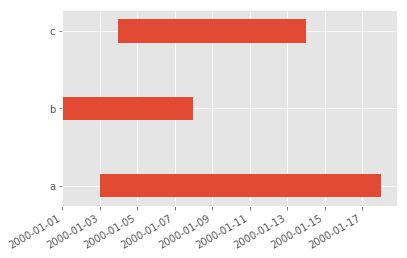

In [167]:
start = [DT.datetime(2000,1,1)+DT.timedelta(days=i) for i in (2,0,3)]
end = [s+DT.timedelta(days=i) for s,i in zip(start, [15,7,10])]
start = mdates.date2num(start)
end = mdates.date2num(end)
yval = [1,2,3]
width = end-start

fig, ax = plt.subplots()
ax.barh(bottom=yval, width=width, left=start, height=0.3)
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
# autorotate the dates
fig.autofmt_xdate()
plt.yticks(yval, ('a','b','c'))
plt.show()

In [176]:
testDF = pd.DataFrame(result.bindings)

print(list(map(int, list(testDF[rdflib.term.Variable('date1')]))))
print(list(map(int, list(testDF[rdflib.term.Variable('date2')]))))
print(list(map(str, list(testDF[rdflib.term.Variable('l')]))))

print(np.arange(len(testDF[rdflib.term.Variable('l')])))

[1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300, 1300]
[1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349, 1349]
['Varia', 'De succedaneis liber', 'Synopsis de remediis', 'De animalibus marinis et terrestribus', 'Opera', 'Opera', 'Opera', 'Opera', 'De alimentis', 'Opera', 'Opera', 'De scientia medica', 'Remedia', 'Botanica', 'Epitome de curatione morborum', 'De purgantibus (=de remediis)']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


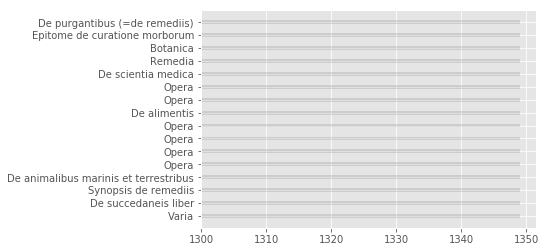

In [181]:
start = list(map(int, list(testDF[rdflib.term.Variable('date1')])))
end = list(map(int, list(testDF[rdflib.term.Variable('date2')])))
start = np.array(start)
end = np.array(end)
yval = np.arange(len(testDF[rdflib.term.Variable('l')]))
width = end-start
titles = list(map(str, list(testDF[rdflib.term.Variable('l')])))


fig, ax = plt.subplots()
ax.barh(bottom=yval, width=width, left=start, height=0.3,
        alpha=0.1,
        color='#000000',)


plt.yticks(yval, titles)
plt.show()


In [261]:
work = 'wo3525929'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?lw ?la (MIN(?d1) AS ?date1) (MAX(?d2) AS ?date2) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?lw .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?la .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wi2
            """ % (work, work))

testDF = pd.DataFrame(result.bindings)
testDF.head()

,date1,date2,la,lw,wo2
0,1250,1280,Alexander Aphrodisiensis,Quaestiones et solutiones,http://www.astronomoumenos.com/id/wo2972314
1,1250,1280,Blemmydes Nicephorus,Laudatio S. Iohannis Euangelistae,http://www.astronomoumenos.com/id/wo7128579
2,1300,1315,Gregorius Nyssenus,In Ecclesiasten homiliae VIII,http://www.astronomoumenos.com/id/wo5945589
3,1260,1270,Constantinus Manasses,Epistulae,http://www.astronomoumenos.com/id/wo3859341
4,1300,1315,Gnomica,Varia,http://www.astronomoumenos.com/id/wo7063482


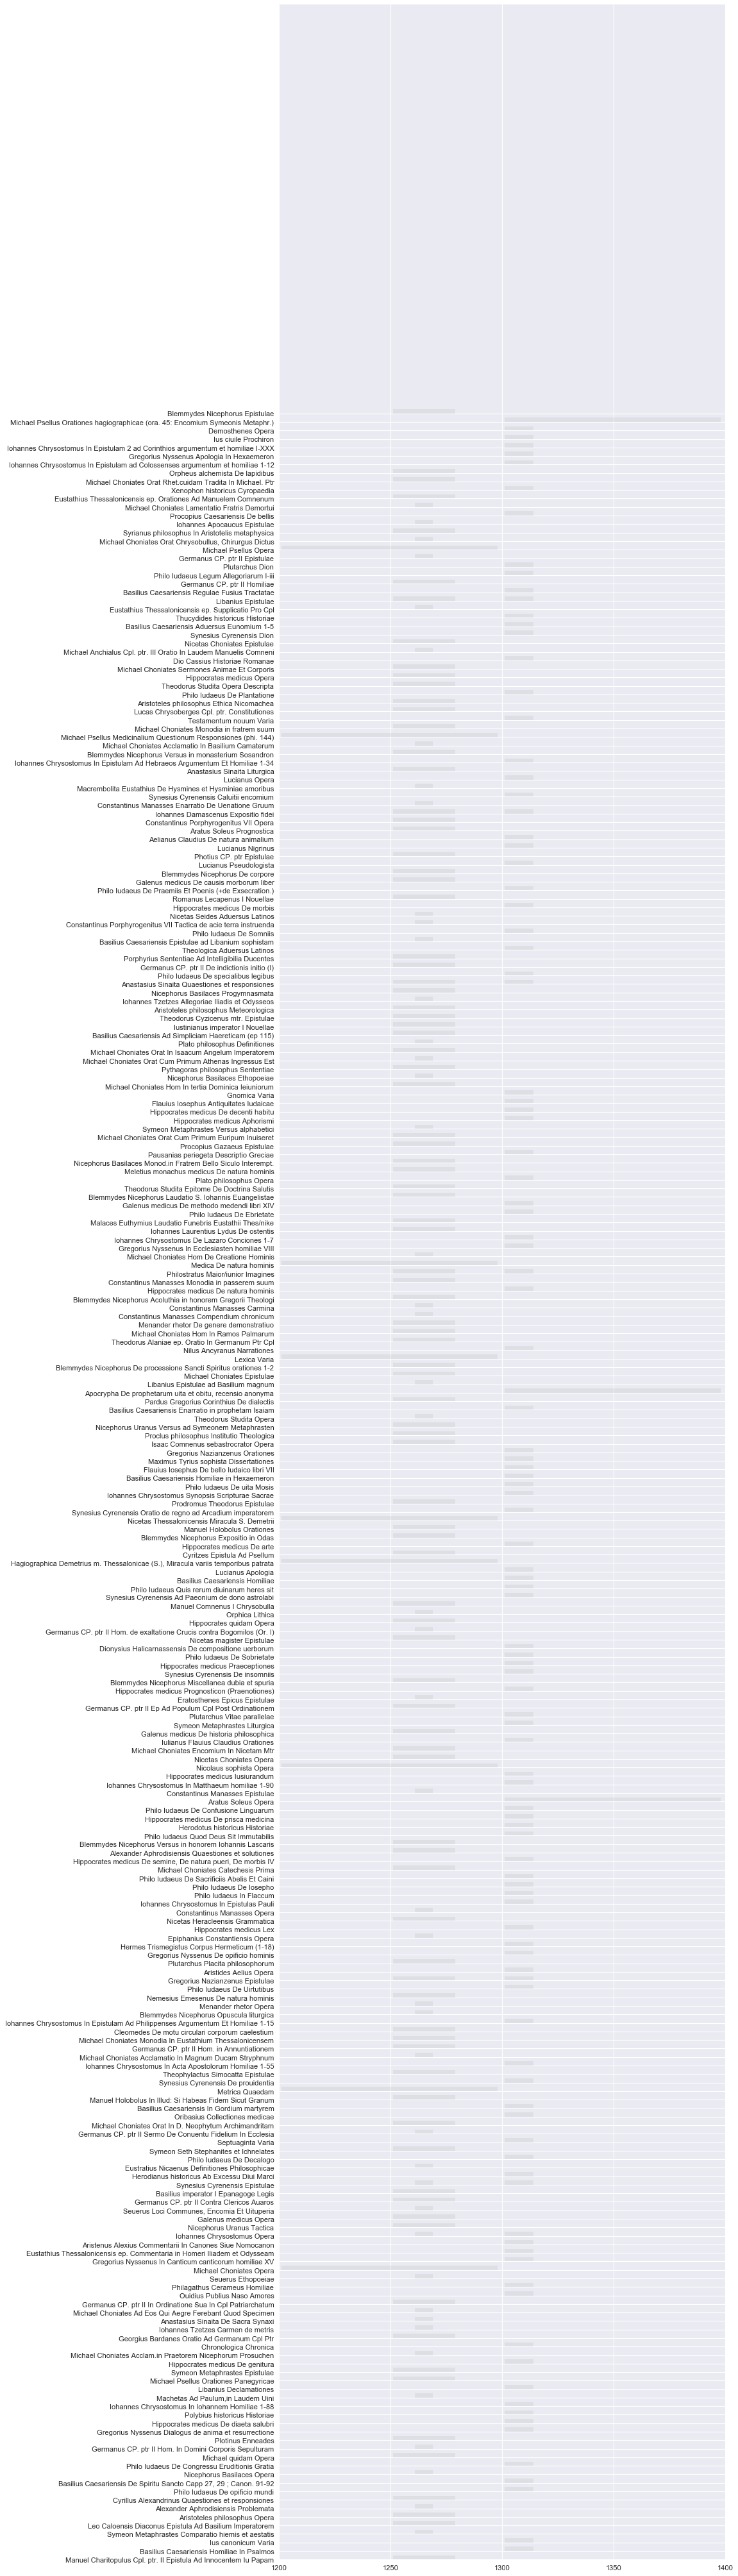

In [264]:
start = list(map(int, list(testDF[rdflib.term.Variable('date1')])))
start[:] = [x + 1 for x in start]
end = list(map(int, list(testDF[rdflib.term.Variable('date2')])))
end[:] = [x - 1 for x in end]
start = np.array(start)
end = np.array(end)
width = end-start
titles_all = list(map(str, list(testDF[rdflib.term.Variable('lw')])))
authors_all = list(map(str, list(testDF[rdflib.term.Variable('la')])))
i = 0
for title in titles_all:
    titles_all[i] = authors_all[i] + " " + title
    i = i + 1
yval_all = np.arange(len(titles_all))
titles = list(set(titles_all))
yval = np.arange(len(list(set(titles))))

titles_vals = dict()
for i in range (0, len(yval)):
    titles_vals[titles[i]] = yval[i]
    
#print(titles_vals)

#print(start, type(start))
#print(end, type(end))
#print(width, type(width))
#print(titles_all, type(titles_all))
#print(yval_all, type(yval_all))
#print(titles, type(yval))

#print(len(titles_all))
#print(len(titles))
#print(len(yval_all))
#print(len(yval))


fig, ax = plt.subplots()
for val in yval:
    ax.barh(bottom=val, width=0, left=min(start), height=0.5, alpha=0.1, color='#000000',)
    # min(start) because otherwise graph is moved over to start at 0


for i in range(0, len(titles_all)):
    ax.barh(bottom=titles_vals[titles_all[i]], width=width[i], left=start[i], height=0.5, alpha=0.05, color='#000000',)   
#ax.barh(bottom=yval, width=width, left=start, height=0.3, alpha=0.1, color='#000000',)


plt.yticks(yval, titles)


plt.rcParams["figure.figsize"] = (10,70)


In [265]:
work = 'wo2911568'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?lw ?la (MIN(?d1) AS ?date1) (MAX(?d2) AS ?date2) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?lw .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?la .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wi2
            """ % (work, work))

testDF = pd.DataFrame(result.bindings)
testDF.head()

,date1,date2,la,lw,wo2
0,1300,1399,Ammonas,Apophthegmata,http://www.astronomoumenos.com/id/wo5802264
1,1400,1599,Theon Alexandrinus,Commentaria in Ptolemaei canones,http://www.astronomoumenos.com/id/wo1131137
2,1200,1299,Ptolemaeus Claudius,Harmonica,http://www.astronomoumenos.com/id/wo8250014
3,1500,1599,Iohannes Pothus Pediasimus,Scholia in Cleomedis de cyclica theoria,http://www.astronomoumenos.com/id/wo3613144
4,1300,1399,Euclides,Elementa,http://www.astronomoumenos.com/id/wo8411826


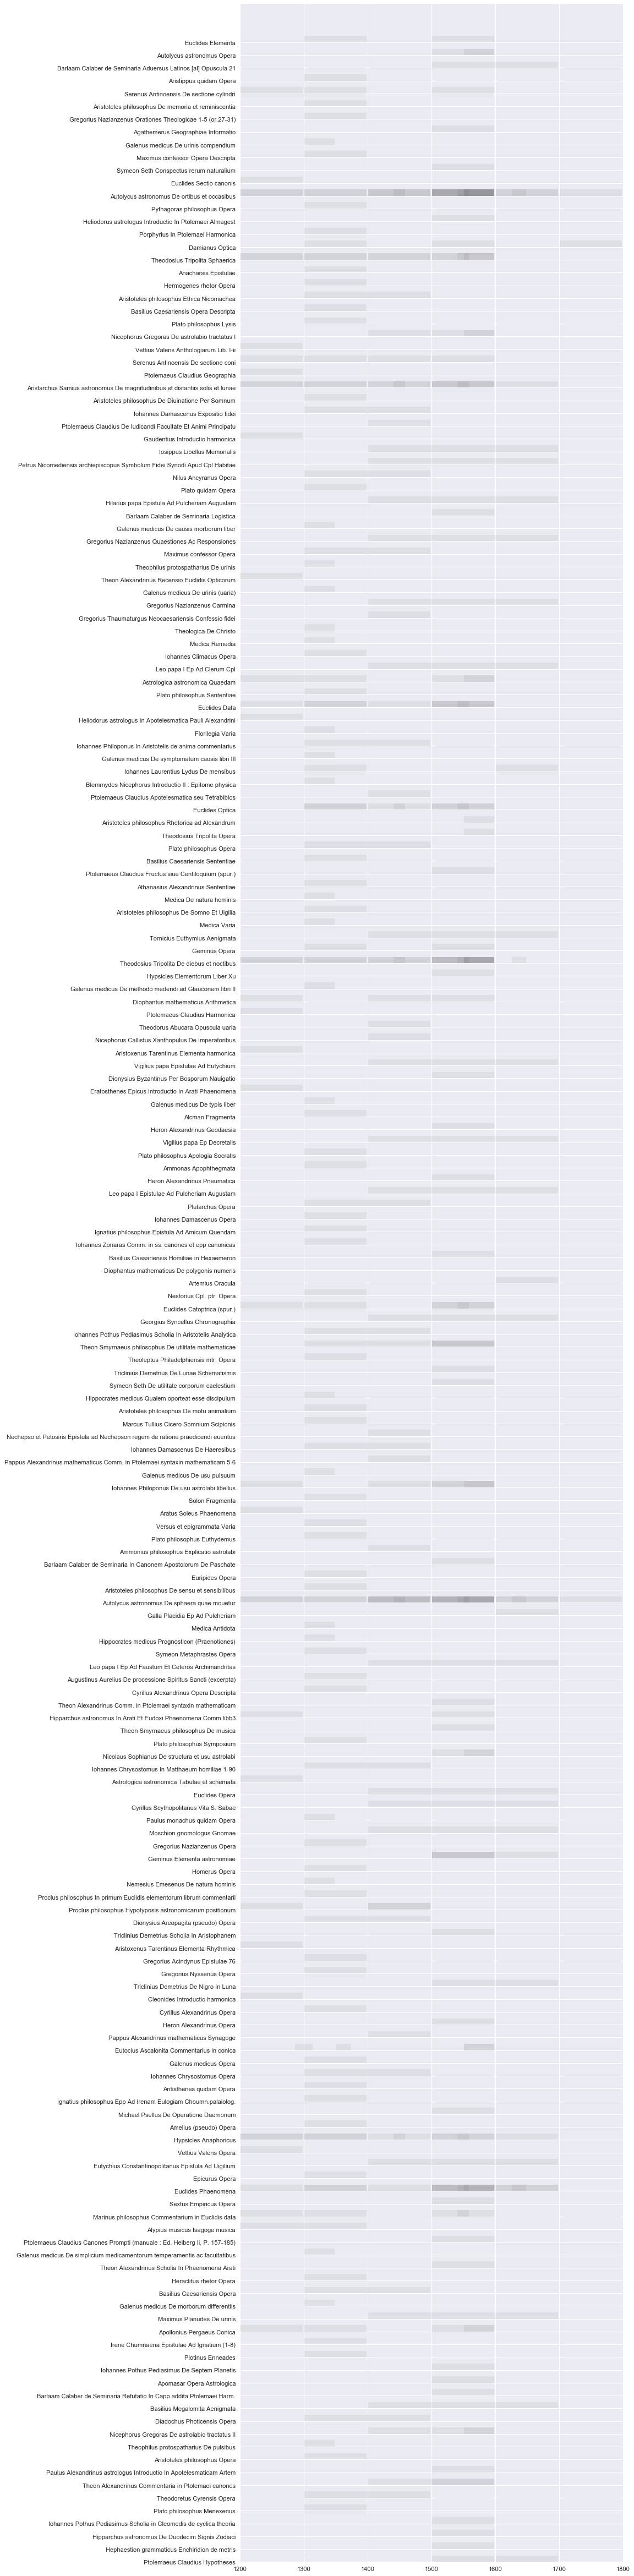

In [266]:
start = list(map(int, list(testDF[rdflib.term.Variable('date1')])))
start[:] = [x + 1 for x in start]
end = list(map(int, list(testDF[rdflib.term.Variable('date2')])))
end[:] = [x - 1 for x in end]
start = np.array(start)
end = np.array(end)
width = end-start
titles_all = list(map(str, list(testDF[rdflib.term.Variable('lw')])))
authors_all = list(map(str, list(testDF[rdflib.term.Variable('la')])))
i = 0
for title in titles_all:
    titles_all[i] = authors_all[i] + " " + title
    i = i + 1
yval_all = np.arange(len(titles_all))
titles = list(set(titles_all))
yval = np.arange(len(list(set(titles))))

titles_vals = dict()
for i in range (0, len(yval)):
    titles_vals[titles[i]] = yval[i]


fig, ax = plt.subplots()
for val in yval:
    ax.barh(bottom=val, width=0, left=min(start), height=0.5, alpha=0.1, color='#000000',)
    # min(start) because otherwise graph is moved over to start at 0


for i in range(0, len(titles_all)):
    ax.barh(bottom=titles_vals[titles_all[i]], width=width[i], left=start[i], height=0.5, alpha=0.05, color='#000000',)   

plt.yticks(yval, titles)

plt.rcParams["figure.figsize"] = (10,40)


In [267]:
work = 'wo5649233'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?lw ?la (MIN(?d1) AS ?date1) (MAX(?d2) AS ?date2) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?lw .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?la .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wi2
            """ % (work, work))

testDF = pd.DataFrame(result.bindings)
testDF.head()

,date1,date2,la,lw,wo2
0,1300,1399,Euclides,Elementa,http://www.astronomoumenos.com/id/wo8411826
1,1400,1599,Theon Alexandrinus,Commentaria in Ptolemaei canones,http://www.astronomoumenos.com/id/wo1131137
2,1500,1599,Theon Alexandrinus,Recensio Euclidis Opticorum,http://www.astronomoumenos.com/id/wo5476584
3,1400,1499,Euclides,Phaenomena,http://www.astronomoumenos.com/id/wo9903453
4,1200,1299,Ptolemaeus Claudius,Syntaxis mathematica (Almageste) (Lib. I-XIII ...,http://www.astronomoumenos.com/id/wo5131463


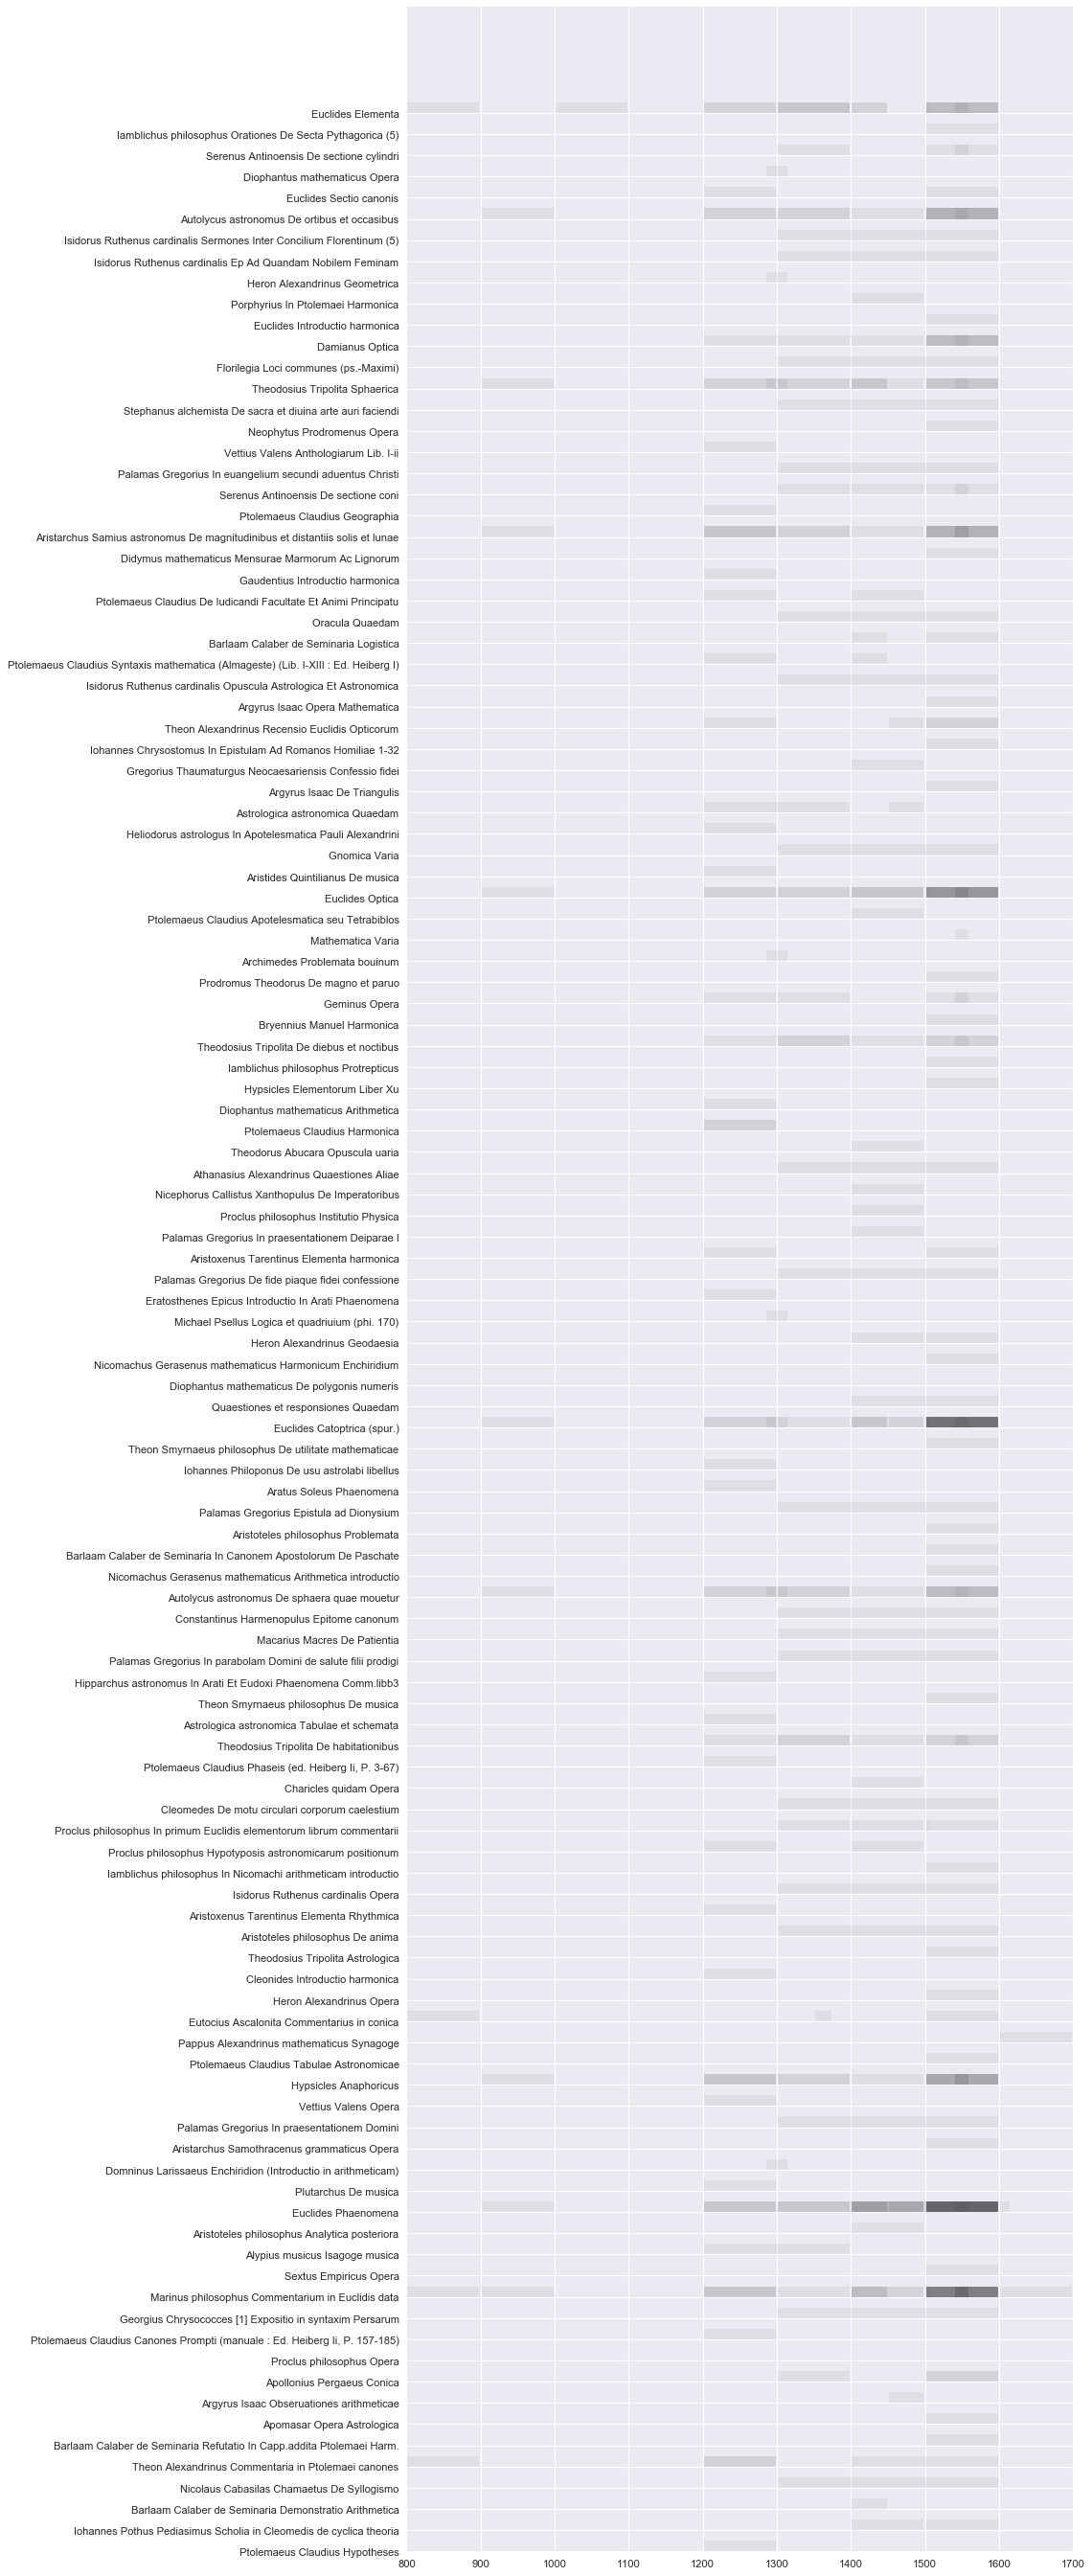

In [268]:
start = list(map(int, list(testDF[rdflib.term.Variable('date1')])))
start[:] = [x + 1 for x in start]
end = list(map(int, list(testDF[rdflib.term.Variable('date2')])))
end[:] = [x - 1 for x in end]
start = np.array(start)
end = np.array(end)
width = end-start
titles_all = list(map(str, list(testDF[rdflib.term.Variable('lw')])))
authors_all = list(map(str, list(testDF[rdflib.term.Variable('la')])))
i = 0
for title in titles_all:
    titles_all[i] = authors_all[i] + " " + title
    i = i + 1
yval_all = np.arange(len(titles_all))
titles = list(set(titles_all))
yval = np.arange(len(list(set(titles))))

titles_vals = dict()
for i in range (0, len(yval)):
    titles_vals[titles[i]] = yval[i]


fig, ax = plt.subplots()
for val in yval:
    ax.barh(bottom=val, width=0, left=min(start), height=0.5, alpha=0.1, color='#000000',)
    # min(start) because otherwise graph is moved over to start at 0


for i in range(0, len(titles_all)):
    ax.barh(bottom=titles_vals[titles_all[i]], width=width[i], left=start[i], height=0.5, alpha=0.05, color='#000000',)   

plt.yticks(yval, titles)

plt.rcParams["figure.figsize"] = (10,40)


In [269]:
work = 'wo8640813'

result = g.query(
        """
        PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#type>
        SELECT ?wo2 ?lw ?la (MIN(?d1) AS ?date1) (MAX(?d2) AS ?date2) WHERE {
            ?ms astr:msContains ?wi1 .
            ?wi1 astr:witnessOf <http://www.astronomoumenos.com/id/%s> .
            ?ms astr:msContains ?wi2 .
            ?wi2 astr:witnessOf ?wo2 .
            ?wo2 rdfs:label ?lw .
            ?wo2 astr:hasContributor ?au .
            ?au rdfs:label ?la .
            ?wi2 astr:hasClaim/astr:hasStartDate ?d1 .
            ?wi2 astr:hasClaim/astr:hasEndDate ?d2 .
            FILTER( ?wo2 != <http://www.astronomoumenos.com/id/%s> )
            }
            GROUP BY ?wi2
            """ % (work, work))

testDF = pd.DataFrame(result.bindings)
testDF.head()

,date1,date2,la,lw,wo2
0,1300,1399,Plato philosophus,Cratylus,http://www.astronomoumenos.com/id/wo5723972
1,1000,1099,Albinus (Alcinous),Introductio in Platonem,http://www.astronomoumenos.com/id/wo3579124
2,1000,1099,Plato philosophus,Amatores,http://www.astronomoumenos.com/id/wo3473977
3,1400,1499,Palladas,Epigrammata,http://www.astronomoumenos.com/id/wo6889228
4,1000,1099,Plato philosophus,Laches,http://www.astronomoumenos.com/id/wo7807542


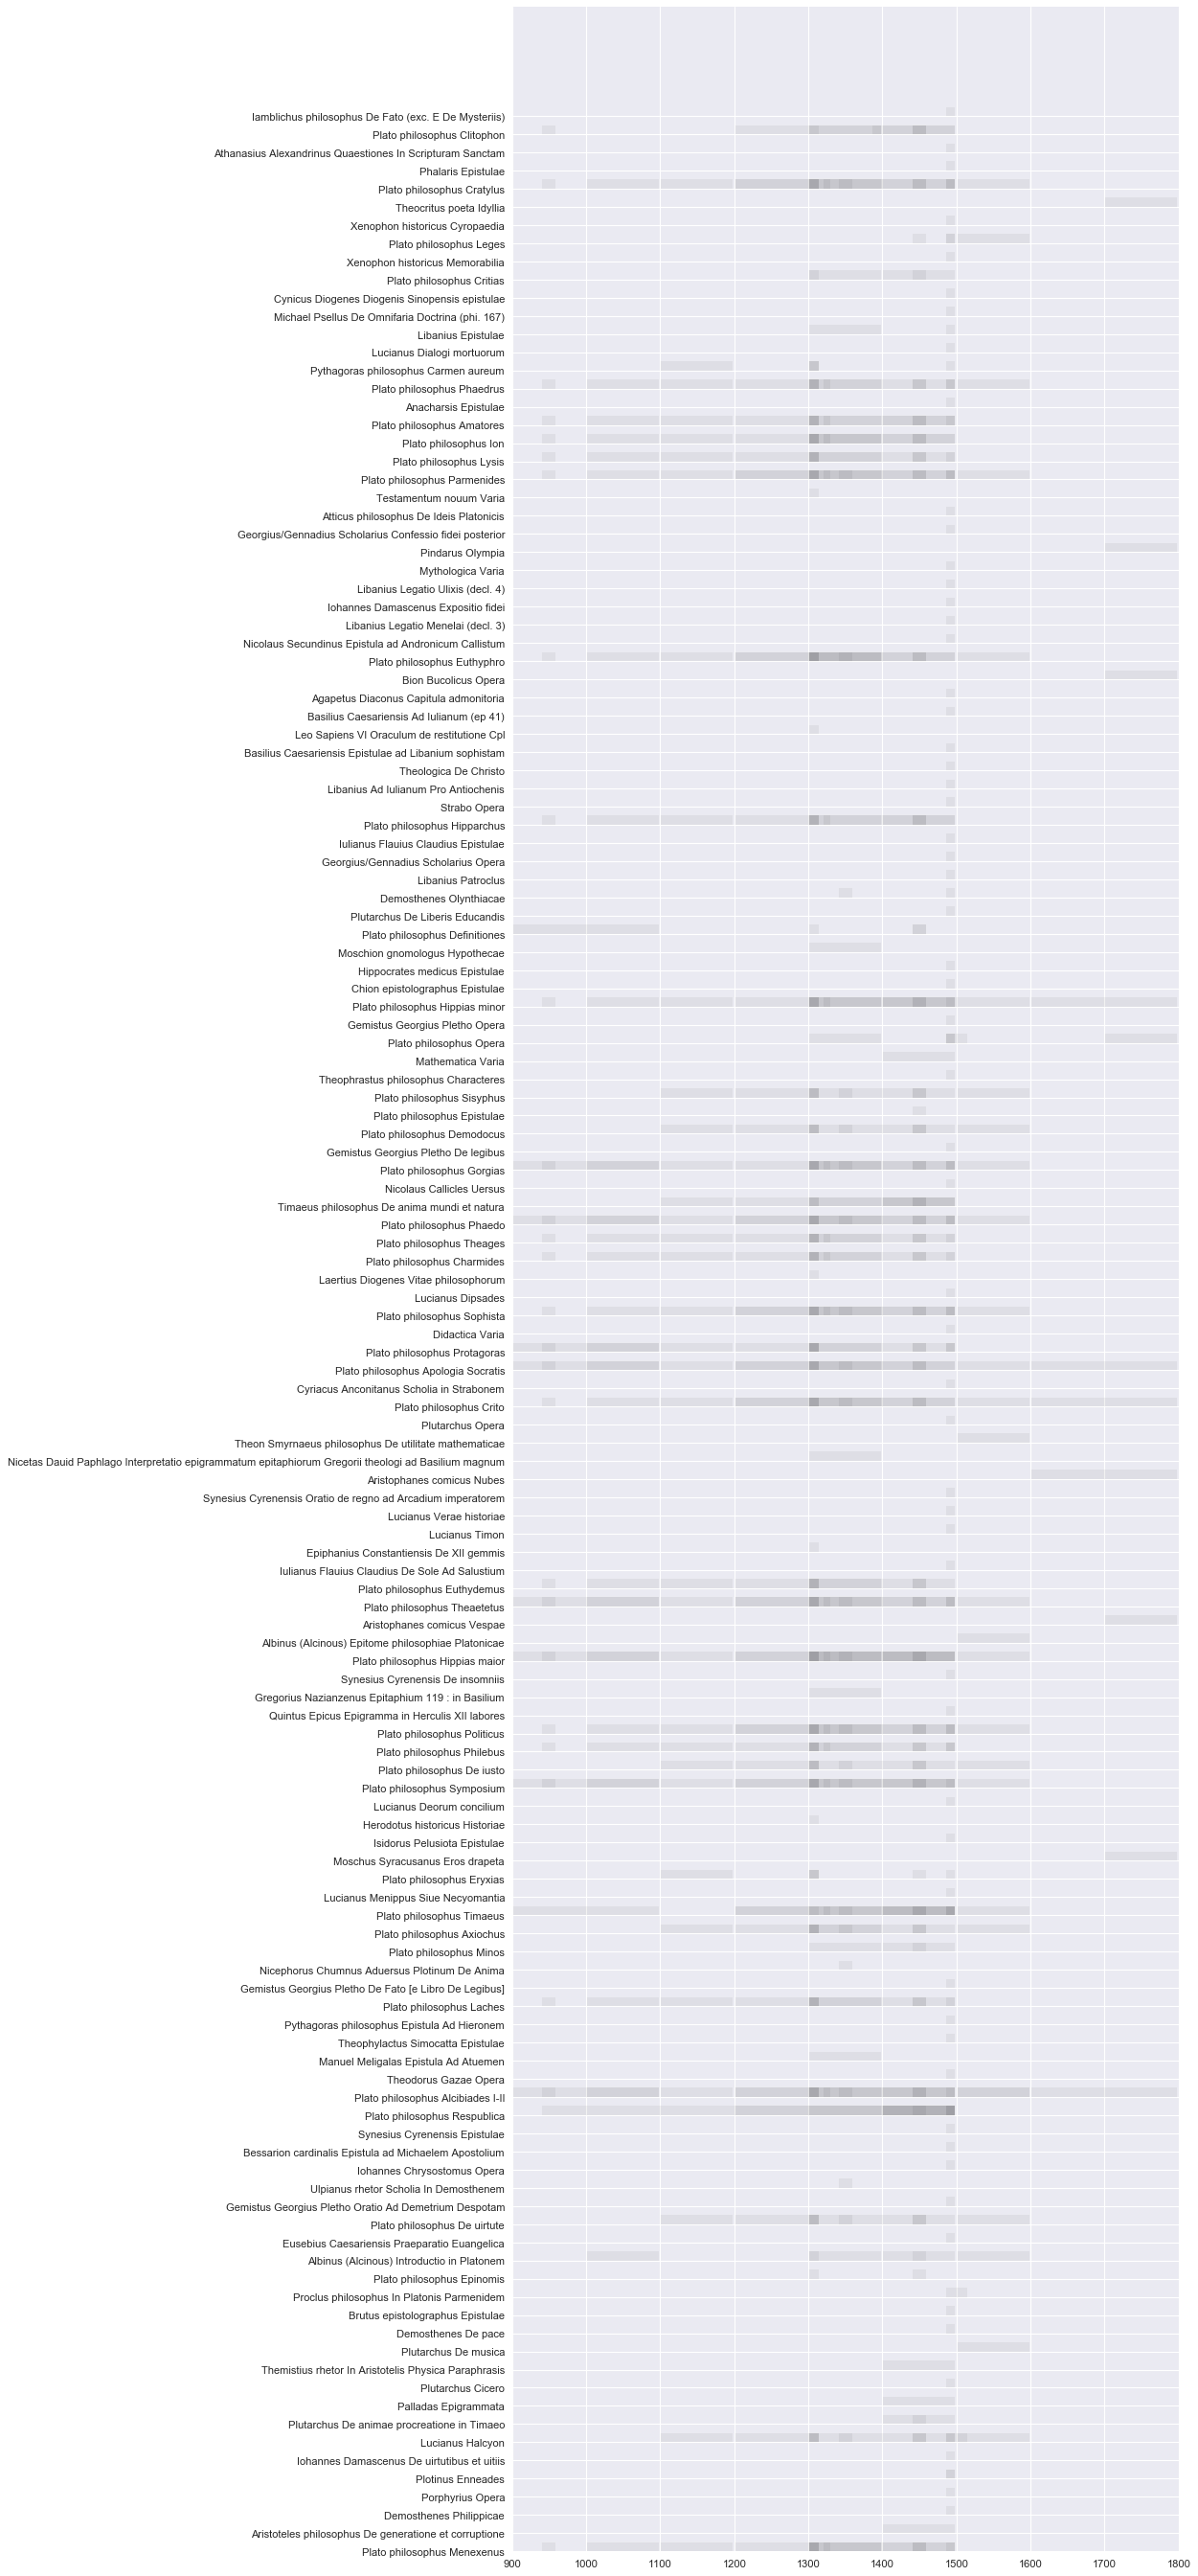

In [270]:
start = list(map(int, list(testDF[rdflib.term.Variable('date1')])))
start[:] = [x + 1 for x in start]
end = list(map(int, list(testDF[rdflib.term.Variable('date2')])))
end[:] = [x - 1 for x in end]
start = np.array(start)
end = np.array(end)
width = end-start
titles_all = list(map(str, list(testDF[rdflib.term.Variable('lw')])))
authors_all = list(map(str, list(testDF[rdflib.term.Variable('la')])))
i = 0
for title in titles_all:
    titles_all[i] = authors_all[i] + " " + title
    i = i + 1
yval_all = np.arange(len(titles_all))
titles = list(set(titles_all))
yval = np.arange(len(list(set(titles))))

titles_vals = dict()
for i in range (0, len(yval)):
    titles_vals[titles[i]] = yval[i]


fig, ax = plt.subplots()
for val in yval:
    ax.barh(bottom=val, width=0, left=min(start), height=0.5, alpha=0.1, color='#000000',)
    # min(start) because otherwise graph is moved over to start at 0


for i in range(0, len(titles_all)):
    ax.barh(bottom=titles_vals[titles_all[i]], width=width[i], left=start[i], height=0.5, alpha=0.05, color='#000000',)   

plt.yticks(yval, titles)

plt.rcParams["figure.figsize"] = (10,40)
